<a href="https://colab.research.google.com/github/Marianderita/ML_Practice/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [4]:
data = "/content/drive/MyDrive/Python/ML/Data/medical-charges.csv"
df = pd.read_csv(data)

In [6]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Відповідь:

1) Для прогнозу можна побудувати rule-based модель, де кожен фактор має вагу залежно від сили впливу. Найбільший вплив має статус куріння, далі BMI та вік. Кількість дітей та регіон мають менший вплив, тому їх ваги будуть нижчими. Ваги можна визначити на основі середніх витрат у групах або кореляційного аналізу.

2) Взяти середні витрати по різних сегментах людей. Наприклад, окремо по курцях і некурцях, по вікових групах, по BMI. Тоді для нової людини можна брати середнє значення для її сегмента і додавати невеликі поправки, наприклад за кількість дітей або регіон.

3) Ще можна перевести всі фактори в умовні бали і зробити шкалу до 100. Тобто кожен параметр дає свою частину балів залежно від того, наскільки він впливає на charges. Наприклад, куріння може давати найбільше балів, BMI і вік — середню частину, а кількість дітей чи регіон — мінімальну. У результаті всі бали сумуються, і чим ближче до 100, тим вищі очікувані витрати. Це такий узагальнений індекс ризику, який дозволяє простіше інтерпретувати прогноз.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [22]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['orange', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'purple', 'orange', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Висновок:

По гістограмі видно, що розподіл медичних витрат сильно зміщений вправо: більшість значень знаходяться у нижньому діапазоні, але є довгий “хвіст” великих витрат. Це означає, що дорогі чарджі трапляються рідше, але сильно впливають на загальний розподіл.

Якщо дивитись на розбиття за статтю, суттєвої різниці між чоловіками і жінками не видно — їх розподіли сильно перекриваються. Медіани приблизно схожі, хоча у чоловіків трохи більший розкид значень і більше високих витрат у верхньому діапазоні.

За регіонами також немає різких відмінностей. Форма розподілу в усіх регіонах схожа: основна маса значень у нижніх витратах і поодинокі великі значення. Можна сказати, що регіон впливає на charges менше, ніж інші фактори.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [26]:
fig_region = px.histogram(
    df,
    x="region",
    color="smoker",
    barmode="group",
    title="Розподіл регіонів залежно від куріння")
fig_region.show()

In [27]:
fig_children = px.histogram(
    df,
    x="children",
    color="smoker",
    barmode="group",
    title="Кількість дітей залежно від куріння")
fig_children.show()


По розподілу регіонів видно, що і серед курців, і серед некурців люди досить рівномірно представлені в усіх регіонах. Некурців у кожному регіоні значно більше. Явної залежності куріння від регіону не спостерігається.

Щодо кількості дітей, найбільше як курців, так і некурців - без дітей або з 1–2 дітьми. Зі збільшенням кількості дітей кількість людей зменшується в обох групах. Виглядає так, що наявність дітей не має сильного зв’язку з тим, чи людина курить.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [34]:
fig = px.violin(
    df,
    x="children",
    y="charges",
    box=True,
    points="all",
    title="Зв’язок між charges та кількістю дітей")
fig.show()


По графіку видно, що найбільше спостережень у людей без дітей або з 1–2 дітьми. У цих групах також найбільший розкид медичних витрат.

Чіткої залежності між кількістю дітей і charges не спостерігається. Високі витрати зустрічаються майже в усіх групах, але зі збільшенням кількості дітей просто стає менше спостережень.

Тому можна припустити, що кількість дітей не є сильним фактором, який визначає медичні витрати.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [37]:
non_smoker_df = df[df.smoker == 'no']

In [38]:
def estimate_charges(age, w, b):
    return w * age + b

In [39]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

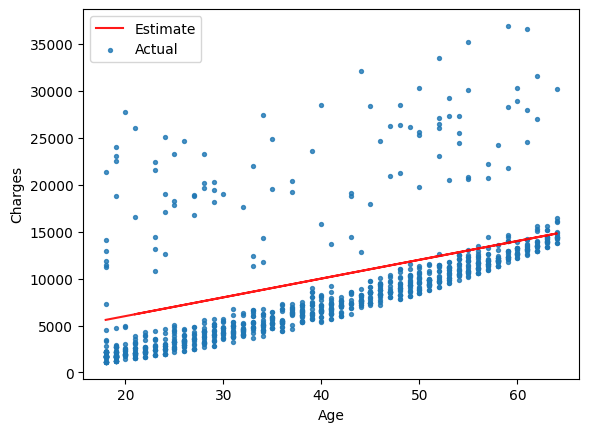

In [51]:
try_parameters(non_smoker_df, w=200, b=2000)

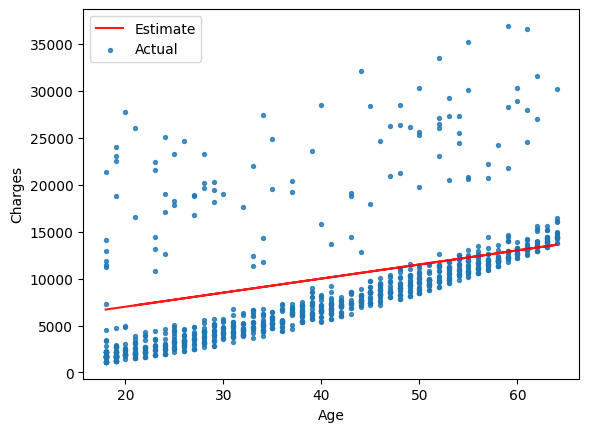

In [52]:
try_parameters(non_smoker_df, w=150, b=4000)

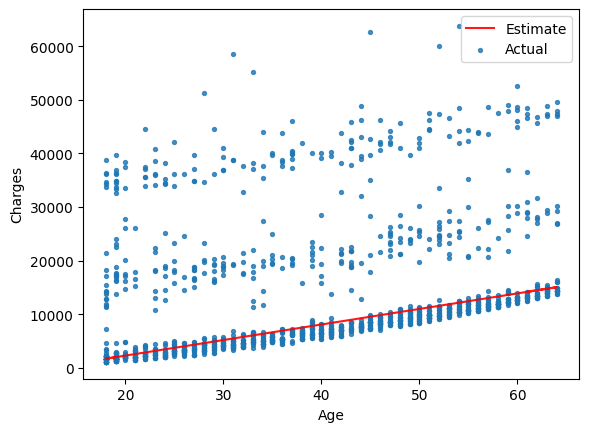

In [79]:
try_parameters(df, 290, -3500)

Я спробувала кілька різних значень w і b, щоб підігнати лінійну залежність між віком і charges. Зі збільшенням w лінія стає крутішою, а параметр b зміщує її вгору або вниз. Один з найращих результатів - це 290 та -3500

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [62]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [76]:
def estimate_charges(age, w, b):
    return w * age + b

pairs = [(200, 2000), (150, 4000), (285, -3500), (290, -3600)]

In [77]:
targets = non_smoker_df["charges"].values
ages = non_smoker_df["age"].values

In [78]:
for w, b in pairs:
    preds = estimate_charges(ages, w, b)
    print((w, b), "RMSE =", rmse(targets, preds))

(200, 2000) RMSE = 4971.5967339993995
(150, 4000) RMSE = 5160.849711656232
(285, -3500) RMSE = 4722.786684262631
(290, -3600) RMSE = 4713.460397850508


In [67]:
df.charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


Найменше значення RMSE вийшло для параметрів w = 290 і b = -3500.

Щоб знайти кращі значення w і b методом проб і помилок, можна поступово змінювати їх у певному діапазоні та обирати ті, при яких RMSE мінімальне. Спочатку варто перевіряти широкий діапазон, а потім звужувати пошук біля найкращих значень.